In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
VApop = pd.read_csv("/home/mondo/Downloads/virginiapop.csv")
VAvotes = pd.read_csv("/home/mondo/Downloads/AllTimeTopVoteGetters.csv")

In [3]:
VApop.head()

,date,Population,Annual Change
0,1900-12-01,1858000,NaN
1,1901-12-01,1887000,1.56
2,1902-12-01,1894000,0.37
3,1903-12-01,1890000,-0.21
4,1904-12-01,1889000,-0.05


In [4]:
VAvotes.head()

,Candidate,PoliticalParty,ElectionYear,OfficeSought,IsIncument,TotalVotes
0,Mark R. Warner,Democratic,2020,Member United States Senate,True,2466500
1,Joseph R. Biden,Democratic,2020,President and Vice President,False,2413568
2,Mark R. Warner,Democratic,2008,United States Senate - 2001 CD Lines,False,2369373
3,Timothy M. Kaine,Democratic,2012,Member United States Senate,False,2010067
4,Hillary Clinton,Democratic,2016,President and Vice President,False,1981473


In [5]:
VAvotes = VAvotes.sort_values(by = "ElectionYear")
VAvotes.reset_index(inplace=True)
del VAvotes['index']
VAvotes.head()

,Candidate,PoliticalParty,ElectionYear,OfficeSought,IsIncument,TotalVotes
0,J WARNER,Republican,1996,United States Senate - 2001 CD Lines,False,1179088
1,CLINTON,Democratic,1996,President and Vice President - 2001 CD Lines,False,1039983
2,M WARNER,Democratic,1996,United States Senate - 2001 CD Lines,False,1064119
3,DOLE,Republican,1996,President and Vice President - 2001 CD Lines,False,1086819
4,C ROBB,Democratic,2000,United States Senate - 2001 CD Lines,False,1233185


In [105]:
VAvotes.head()

,Candidate,PoliticalParty,ElectionYear,OfficeSought,IsIncument,TotalVotes
0,J WARNER,Republican,1996,United States Senate - 2001 CD Lines,False,1179088
1,CLINTON,Democratic,1996,President and Vice President - 2001 CD Lines,False,1039983
2,M WARNER,Democratic,1996,United States Senate - 2001 CD Lines,False,1064119
3,DOLE,Republican,1996,President and Vice President - 2001 CD Lines,False,1086819
4,C ROBB,Democratic,2000,United States Senate - 2001 CD Lines,False,1233185


In [6]:
VAvotes["TotalVotes"][pd.Index(VAvotes["Candidate"]).get_loc("J WARNER")]

0    1179088
9    1226404
Name: TotalVotes, dtype: int64

In [7]:
Polparty = []
for i in VAvotes["PoliticalParty"]:
    if i == "Republican":
        Polparty.append('r')
    elif i == "Democratic":
        Polparty.append('b')
    else:
        Polparty.append('g')

In [8]:
nameMaxValue = []
votes = []
for Year in VAvotes["ElectionYear"].unique():
    n = VAvotes["TotalVotes"][pd.Index(VAvotes["ElectionYear"]).get_loc(Year)]
    if type(n) == numpy.int64:
        largeval = n
    else:
        largeval = max(VAvotes["TotalVotes"][pd.Index(VAvotes["ElectionYear"]).get_loc(Year)])
    votes.append(largeval)
    nameMaxValue.append(VAvotes["Candidate"][pd.Index(VAvotes["TotalVotes"]).get_loc(largeval)])

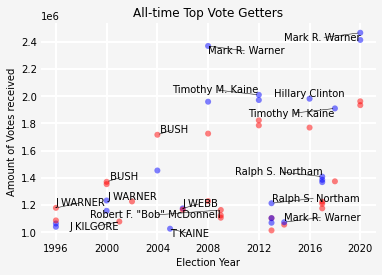

In [12]:
fig = plt.figure(facecolor="whitesmoke")
ax = fig.add_subplot(111, axisbelow=True)
ax.scatter(VAvotes["ElectionYear"],VAvotes["TotalVotes"],c=Polparty , alpha=0.5, lw=.003)
# plt.rcParams['figure.facecolor'] = 'white'
texts = []
for x, y, s in zip(VAvotes["ElectionYear"].unique(),votes, nameMaxValue):
    texts.append(plt.text(x,y,s))

adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

ax.set_facecolor('whitesmoke')
ax.set_xlabel('Election Year')
ax.set_ylabel('Amount of Votes received')

# ax.set_ylim(0,1.2)
plt.xticks(range(1996,2022,4))
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("All-time Top Vote Getters")
plt.show()  

fig.savefig('whatever.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [18]:
VApop["date"] = VApop["date"].map(lambda x: x[:-2])

In [19]:
VApop.head()

,date,Population,Annual Change
0,1900,1858000,NaN
1,1901,1887000,1.56
2,1902,1894000,0.37
3,1903,1890000,-0.21
4,1904,1889000,-0.05


In [20]:
# pd.Index(VApop["date"]).get_loc("1996")
temp = []
for i, Year in enumerate(VAvotes["ElectionYear"].unique()):
    n = VAvotes["TotalVotes"][pd.Index(VAvotes["ElectionYear"]).get_loc(Year)]/VApop[" Population"][pd.Index(VApop["date"]).get_loc(str(Year))]
    if hasattr(n, "__len__") and (not isinstance(n, str)):
        for j in n:
            temp.append(j)
    else:
        temp.append(n)

AttributeError: 'list' object has no attribute 'shape'

In [21]:
VAvotes["VoteRatio"] = temp

In [22]:
nameMaxRatio = []
maxRatioVotes = []
for Year in VAvotes["ElectionYear"].unique():
    n = VAvotes["VoteRatio"][pd.Index(VAvotes["ElectionYear"]).get_loc(Year)]
    if hasattr(n, "__len__") and (not isinstance(n, str)):
        largeval = max(VAvotes["VoteRatio"][pd.Index(VAvotes["ElectionYear"]).get_loc(Year)])
    else:
        largeval = n
    maxRatioVotes.append(largeval)
    nameMaxRatio.append(VAvotes["Candidate"][pd.Index(VAvotes["VoteRatio"]).get_loc(largeval)])

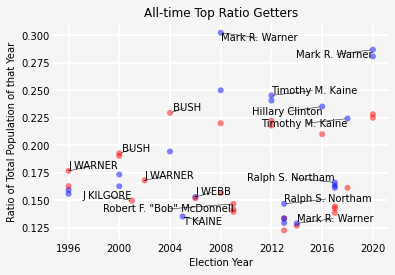

In [25]:
fig = plt.figure(facecolor="whitesmoke")
ax = fig.add_subplot(111, axisbelow=True)
ax.scatter(VAvotes["ElectionYear"],VAvotes["VoteRatio"],c=Polparty , alpha=0.5, lw=.003)
texts = []
for x, y, s in zip(VAvotes["ElectionYear"].unique(),maxRatioVotes, nameMaxRatio):
    texts.append(plt.text(x,y,s))

adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

ax.set_facecolor('whitesmoke')
ax.set_xlabel('Election Year')
ax.set_ylabel('Ratio of Total Population of that Year')

# ax.set_ylim(0,1.2)
plt.xticks(range(1996,2022,4))
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("All-time Top Ratio Getters")
plt.show()

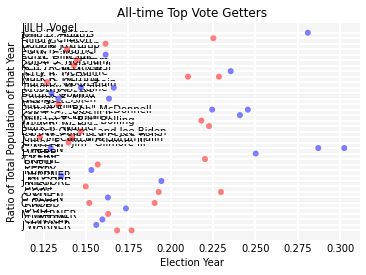

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.scatter(VAvotes["VoteRatio"],VAvotes["Candidate"],c=Polparty , alpha=0.5, lw=.003)


ax.set_facecolor('whitesmoke')
ax.set_xlabel('Election Year')
ax.set_ylabel('Ratio of Total Population of that Year')


ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_yticklabels(VAvotes["Candidate"], fontsize = 10, va='bottom', ha='left')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title("All-time Top Vote Getters")
plt.show()

